# Activity 3.1 : Convolutional Neural Network

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
<u>**Hands-on Activity 3.1** | **Convolutional Neural Network**
**Name** | Adrian Justin Bulambao
**Section** | CPE32S3
**Date Performed**: | February 8, 2026
**Date Submitted**: | February 8, 2026
**Instructor**: | Engr. Neal Barton James Matira


#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


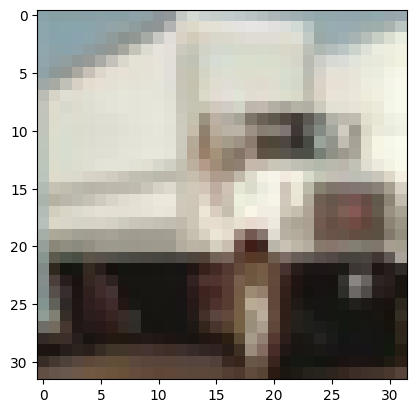

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [9]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

c:\Users\JUSTIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [10]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3530 - loss: 1.7717 - val_accuracy: 0.4500 - val_loss: 1.5288
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4604 - loss: 1.4952 - val_accuracy: 0.5048 - val_loss: 1.3660
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4974 - loss: 1.3999 - val_accuracy: 0.5536 - val_loss: 1.2533
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5222 - loss: 1.3359 - val_accuracy: 0.5463 - val_loss: 1.2526
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5406 - loss: 1.2902 - val_accuracy: 0.5467 - val_loss: 1.2898
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5560 - loss: 1.2454 - val_accuracy: 0.5729 - val_loss: 1.2007
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5707 - loss: 1.2162 - val_accuracy: 0.6036 - val_loss: 1.1338
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5789 - loss: 1.1914 - 

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [11]:
from keras.datasets import cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
import numpy as np

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#I will modify my data which is suitable for image classification
mean = np.mean(x_train)
std = np.mean(x_train)

x_train = (x_train - mean) / (std + 1e-8)
x_test = (x_test - mean) / (std + 1e-8)

In [14]:
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

In [15]:
regulizer_lr = 0.0003

input = Input((32,32,3), name = 'Inputlayer')

#I will Implment pyramid strat
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_1')(input)
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_2')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_3')(X)
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_4')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_5')(X)
X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_6')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_7')(X)
X = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_8')(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)


X = Flatten()(X)
X = Dropout(0.3)(X)
output = Dense(10, activation = 'softmax', name = 'outputlayer')(X)

In [16]:
my_cfar10model = Model(inputs= input, outputs = output, name ='MYCFARMODEL')
my_cfar10model.compile(optimizer = Adam(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
checkpoint = EarlyStopping(monitor = 'val_loss', patience = 21, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor = 'val_loss', factor=0.5, min_lr=1e-7, patience = 7)

In [18]:
my_cfar10model.summary()

Model: "MYCFARMODEL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (InputLayer)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_1 (Conv2D)            │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_2 (Conv2D)            │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_3 (Conv2D)            │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_4 (Conv2D)            │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_5 (Conv2D)            │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_6 (Conv2D)            │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_7 (Conv2D)            │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_8 (Conv2D)            │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │        40,97

 Total params: 1,262,282 (4.82 MB)

 Trainable params: 1,261,258 (4.81 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [19]:
model_hist = my_cfar10model.fit(x_train,y_train, epochs=5, batch_size=128, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 211ms/step - accuracy: 0.3719 - loss: 2.1968 - val_accuracy: 0.1391 - val_loss: 3.6934 - learning_rate: 5.0000e-04
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 173ms/step - accuracy: 0.5476 - loss: 1.5582 - val_accuracy: 0.6288 - val_loss: 1.2970 - learning_rate: 5.0000e-04
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 203ms/step - accuracy: 0.6441 - loss: 1.2744 - val_accuracy: 0.6455 - val_loss: 1.2787 - learning_rate: 5.0000e-04
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 219ms/step - accuracy: 0.6975 - loss: 1.1194 - val_accuracy: 0.7100 - val_loss: 1.1314 - learning_rate: 5.0000e-04
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 181ms/step - accuracy: 0.7332 - loss: 1.0115 - val_accuracy: 0.7558 - val_loss: 0.9644 - learning_rate: 5.0000e-04


**Observation**

It only got a 75% accuracy, I think that it lacks epoch to achieve higher accuracy

In [27]:
from tensorflow.keras.losses import CategoricalCrossentropy

regulizer_lr = 0.0003

input = Input((32,32,3), name = 'Inputlayer')
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_1')(input)
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_2')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_3')(X)
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_4')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_5')(X)
X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_6')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', activation = 'relu', name = 'con_layer_7')(X)
X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', activation = 'relu', name = 'con_layer_8')(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)


X = Flatten()(X)
X = Dropout(0.3)(X)
output = Dense(10, activation = 'softmax', name = 'outputlayer')(X)

In [28]:
new_cfar10model = Model(inputs= input, outputs = output, name ='MYCFARMODEL')
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
new_cfar10model.compile(optimizer = Adam(learning_rate=0.0005), loss = loss_fn, metrics = ['accuracy'])

In [29]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',factor=0.3,patience=5,min_lr=1e-6,verbose=1)
checkpoint = EarlyStopping(monitor = 'val_loss', patience = 21, restore_best_weights=True)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
datagen.fit(x_train)


In [31]:
history = new_cfar10model.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=128,validation_data=(x_test, y_test),callbacks=[lr_scheduler, checkpoint],verbose=1)


Epoch 1/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.3418 - loss: 2.2736 - val_accuracy: 0.4457 - val_loss: 1.9611 - learning_rate: 5.0000e-04
Epoch 2/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.4794 - loss: 1.8715 - val_accuracy: 0.5815 - val_loss: 1.6172 - learning_rate: 5.0000e-04
Epoch 3/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5469 - loss: 1.7082 - val_accuracy: 0.5440 - val_loss: 1.6825 - learning_rate: 5.0000e-04
Epoch 4/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6101 - loss: 1.5253 - val_accuracy: 0.6680 - val_loss: 1.3861 - learning_rate: 5.0000e-04
Epoch 5/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6598 - loss: 1.4089 - val_accuracy: 0.6692 - val_loss: 1.4040 - learning_rate: 5.0000e-04
Epoch 6/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6911 - loss: 1.3326 - val_accuracy: 0.6691 - val_loss: 1.3786 - learning_rate: 5.0000e-04
Epoch 7/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 5

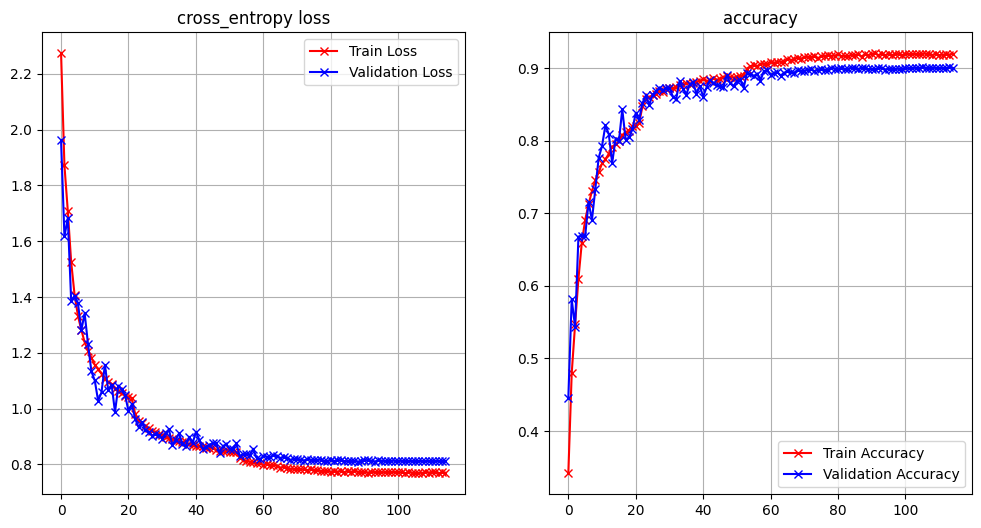

In [32]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

### Observation:

The model had trouble with validation, however it was still able to reach a 90% accuracy.

#### Conclusion

After completing the activity, I learned the basics of Convolutional Neural Networks, including how convolutional, pooling, and fully connected layers work. I also learned how to build and train a CNN model from loading the dataset to training. I realized that having a large dataset alone is not enough without regularization and data augmentation, the model may underperform on unseen data. Lastly, I learned that very deep networks can suffer from vanishing gradient problems.